#  Exploratory Analysis on which cities has the most volatile markets
### Paul Samaniego

In [2]:
import pandas as pd
import os
import numpy as np
import scipy.stats as st
import matplotlib.pyplot as plt
import project1scripts

In [3]:
cwd = os.getcwd()
print(cwd)

C:\Users\Saman\Coolest-project-1


In [4]:
filename = "clean_median_sale_price_v2_df.csv"
df = pd.read_csv(filename, index_col=0)
df.head()

,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,"New York, NY",NY,34491100.0,33935000.0,33535000.0,33351700,34200000,35600000,37100000,38066700,...,54333300,52833300,51833300,51533300,50950000,51033300,51666700,53583300,55833300,57966700
1,"Los Angeles, CA",CA,39400000.0,39733300.0,40733300.0,43066700,45066700,46500000,46833300,47166700,...,85200000,84033300,82700000,81833300,81666700,82733300,83900000,85400000,87333300,88833300
2,"Chicago, IL",IL,16283300.0,15800000.0,16021800.0,17021800,18338500,19783300,20750000,21233300,...,28500000,27833300,27333300,27000000,26900000,27563300,28730000,30030000,31316700,31983300
3,"Dallas, TX",TX,15166700.0,15216700.0,15533300.0,16450000,17280000,17846700,18163300,18112500,...,39050000,38250000,37333300,36333300,36233300,36700000,37700000,38466700,39500000,40033300
4,"Houston, TX",TX,14983300.0,14857200.0,15040500.0,16015500,16741700,17490000,17765000,17865000,...,32100000,31600000,31066700,30600000,30433300,30633300,31333300,32166700,32866700,33366700


In [5]:
#Author: anderoos
df['StateName'] = df['StateName'].astype('str')
# Define categories
northeast = ['ME', 'NH', 'VT', 'MA', 'RI', 'CT', 'NY', 'NJ', 'PA']
southeast = ['DE', 'MD', 'VA', 'WV', 'NC', 'SC', 'GA', 'FL', 'AL', 'MS', 'LA', 'KY', 'TN']
midwest = ['OH', 'IN', 'IL', 'MI', 'WI', 'MN', 'IA', 'MO', 'ND', 'SD', 'NE', 'KS']
west = ['MT', 'ID', 'WY', 'CO', 'NM', 'AZ', 'UT', 'NV', 'CA', 'OR', 'WA', 'AK', 'HI']
southwest = ['TX', 'OK', 'AR']
# Filters state codes into separate dataframes

def USRegion(value):
    if value in northeast:
        return "northeast"
    elif value in southeast:
        return "southeast"
    elif value in midwest:
        return "midwest"
    elif value in west:
        return "west"
    elif value in southwest:
        return "southwest"



df.insert(loc=0, column = "US Region", value = df["StateName"].apply(USRegion))

df.head()
    

,US Region,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
0,northeast,"New York, NY",NY,34491100.0,33935000.0,33535000.0,33351700,34200000,35600000,37100000,...,54333300,52833300,51833300,51533300,50950000,51033300,51666700,53583300,55833300,57966700
1,west,"Los Angeles, CA",CA,39400000.0,39733300.0,40733300.0,43066700,45066700,46500000,46833300,...,85200000,84033300,82700000,81833300,81666700,82733300,83900000,85400000,87333300,88833300
2,midwest,"Chicago, IL",IL,16283300.0,15800000.0,16021800.0,17021800,18338500,19783300,20750000,...,28500000,27833300,27333300,27000000,26900000,27563300,28730000,30030000,31316700,31983300
3,southwest,"Dallas, TX",TX,15166700.0,15216700.0,15533300.0,16450000,17280000,17846700,18163300,...,39050000,38250000,37333300,36333300,36233300,36700000,37700000,38466700,39500000,40033300
4,southwest,"Houston, TX",TX,14983300.0,14857200.0,15040500.0,16015500,16741700,17490000,17765000,...,32100000,31600000,31066700,30600000,30433300,30633300,31333300,32166700,32866700,33366700


In [6]:
df_regions_midwest = df[df["US Region"] == "midwest"]
df_regions_midwest.head()

,US Region,RegionName,StateName,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
2,midwest,"Chicago, IL",IL,16283300.0,15800000.0,16021800.0,17021800,18338500,19783300,20750000,...,28500000,27833300,27333300,27000000,26900000,27563300,28730000,30030000,31316700,31983300
13,midwest,"Detroit, MI",MI,11413300.0,11183300.0,11283300.0,11733300,12500000,13166700,13941700,...,24116700,23443400,22676700,21610000,21516700,21866500,23033200,23949800,25200000,25866700
15,midwest,"Minneapolis, MN",MN,16400000.0,16100000.0,16500000.0,17166700,18250000,19178400,20011700,...,34650000,33933300,33050000,32575000,32258400,32758400,33563300,34580000,35913300,36416700
20,midwest,"St. Louis, MO",MO,13568300.0,13360000.0,13526700.0,13908300,14608300,15306700,15761700,...,23686900,23303600,22985800,22366700,22033300,21866700,22733300,23400000,24833300,25533300
27,midwest,"Cincinnati, OH",OH,13468300.0,13401700.0,13743300.0,14100000,14833300,15360000,15668300,...,24558300,24275000,23816700,23016700,22883300,23016700,24350000,25500000,26725000,27058300


In [7]:
#calculating the rolling 12 month average, for the the first 11 months just doing the minimum
midwest_cities_df = df_regions_midwest.drop(columns=["US Region", "StateName"]).set_index("RegionName")
moving_avg_midwest_df = midwest_cities_df.rolling(window=12, axis=1, min_periods=1).mean()
#moving_avg_midwest_df.to_csv("testing.csv")
moving_avg_midwest_df.head()


C:\Users\Saman\AppData\Local\Temp\ipykernel_1972\1204614780.py:3: FutureWarning: Support for axis=1 in DataFrame.rolling is deprecated and will be removed in a future version. Use obj.T.rolling(...) instead
  moving_avg_midwest_df = midwest_cities_df.rolling(window=12, axis=1, min_periods=1).mean()


,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
RegionName,,,,,,,,,,,,,,,,,,,,,
"Chicago, IL",16283300.0,16041650.0,1.603503e+07,16281725.0,16693080.0,1.720812e+07,1.771410e+07,18154000.0,1.841652e+07,18526540.0,...,2.879167e+07,2.882638e+07,2.883332e+07,2.882499e+07,2.882222e+07,2.883305e+07,2.884111e+07,2.885194e+07,2.887278e+07,2.894638e+07
"Detroit, MI",11413300.0,11298300.0,1.129330e+07,11403300.0,11622640.0,1.187998e+07,1.217451e+07,12466237.5,1.269313e+07,12835490.0,...,2.347709e+07,2.352515e+07,2.355098e+07,2.352959e+07,2.352334e+07,2.353236e+07,2.355804e+07,2.356775e+07,2.358442e+07,2.361498e+07
"Minneapolis, MN",16400000.0,16250000.0,1.633333e+07,16541675.0,16883340.0,1.726585e+07,1.765811e+07,17991900.0,1.821760e+07,18344830.0,...,3.401069e+07,3.410236e+07,3.414819e+07,3.418583e+07,3.421722e+07,3.424862e+07,3.425598e+07,3.423070e+07,3.422764e+07,3.424570e+07
"St. Louis, MO",13568300.0,13464150.0,1.348500e+07,13590825.0,13794320.0,1.404638e+07,1.429143e+07,14483125.0,1.458148e+07,14619660.0,...,2.281988e+07,2.292991e+07,2.305512e+07,2.315790e+07,2.325512e+07,2.331068e+07,2.336945e+07,2.340184e+07,2.344256e+07,2.349117e+07
"Cincinnati, OH",13468300.0,13435000.0,1.353777e+07,13678325.0,13909320.0,1.415110e+07,1.436784e+07,14507487.5,1.456129e+07,14553490.0,...,2.370278e+07,2.382013e+07,2.391319e+07,2.397014e+07,2.403264e+07,2.409237e+07,2.419376e+07,2.430903e+07,2.444028e+07,2.458264e+07


In [8]:
number_of_periods = len(moving_avg_midwest_df.columns)

growth_rate_by_state = pd.DataFrame({
    "Growth Rate":((moving_avg_midwest_df["7/31/2023"] / 
                           moving_avg_midwest_df["1/31/2013"])**(12/number_of_periods)-1)
})

top_3_cities = growth_rate_by_state["Growth Rate"].nlargest(3).index
bottom_3_cities = growth_rate_by_state["Growth Rate"].nsmallest(3).index

cities_to_plot = [item for sublist in [top_3_cities, bottom_3_cities] for item in sublist]

top_bottom_cities = pd.DataFrame({"RegionName":cities_to_plot}).set_index("RegionName")
cities_to_plot
#growth_rate_by_state.head()
#top_bottom_cities.head()

['Cadillac, MI',
 'Traverse City, MI',
 'Auburn, IN',
 'Carbondale, IL',
 'Galesburg, IL',
 'Peoria, IL']

In [9]:
top_bottom_cities_combined = growth_rate_by_state.merge(moving_avg_midwest_df[["1/31/2013", "7/31/2023"]], on="RegionName", how="left")
df_to_plot = top_bottom_cities_combined[top_bottom_cities_combined.index.isin(cities_to_plot)]
#df_to_plot.to_csv("testingv5.csv")
df_to_plot

,Growth Rate,1/31/2013,7/31/2023
RegionName,,,
"Peoria, IL",0.026185,103250.0,135736.083333
"Traverse City, MI",0.087197,147193.0,356572.333333
"Carbondale, IL",0.019214,96983.0,118623.666667
"Galesburg, IL",0.025494,73917.0,96483.250000
"Cadillac, MI",0.095915,71025.0,187233.333333
"Auburn, IN",0.087073,81400.0,196952.750000


In [10]:
#bars = plt.bar(df_to_plot.index, df_to_plot["7/31/2023"])

#for i, bar in enumerate(bars):
#    growth_rate = df_to_plot['Growth Rate'].iloc[i]
#    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height() + 1000, f'{growth_rate:.2%}', ha="center")

#plt.xlabel("City")
#plt.ylabel("Sales in Thousands")

#plt.title("Top 3 / Bottom 3 Midwest Cities")

#plt.grid(True)
#plt.xticks(rotation=45, ha="right")

#plt.tight_layout()
#plt.show()

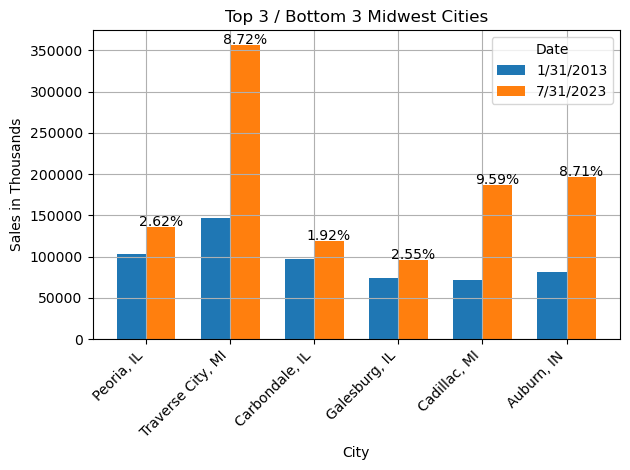

In [21]:
# Extract data
cities = df_to_plot.index
values_1_31_2013 = df_to_plot["1/31/2013"]
values_7_31_2023 = df_to_plot["7/31/2023"]

# Define the width of each bar group
bar_width = 0.35

# Create an array of indices for x-axis positions
x_indices = np.arange(len(cities))

# Create two sets of bars for each city
plt.bar(x_indices - bar_width/2, values_1_31_2013, width=bar_width, label='1/31/2013')
plt.bar(x_indices + bar_width/2, values_7_31_2023, width=bar_width, label='7/31/2023')

# Add labels to the x-axis ticks
plt.xticks(x_indices, cities, rotation=45, ha="right")

# Display the Growth Rate values above each bar
for i, value_7_31_2023 in enumerate(values_7_31_2023):
    growth_rate = df_to_plot['Growth Rate'].iloc[i]
    plt.text(x_indices[i] + bar_width/2, value_7_31_2023 + 1000, f'{growth_rate:.2%}', ha="center")

plt.xlabel("City")
plt.ylabel("Sales in Thousands")
plt.title("Top 3 / Bottom 3 Midwest Cities")

plt.grid(True)
plt.legend(title="Date")
plt.tight_layout()
plt.savefig("Images/Moving Averages/Cities_by_Region/Growth_Midwest_Cities_bar.png")
plt.show()

In [19]:
top_bottom_cities_combined_line = top_bottom_cities.merge(moving_avg_midwest_df, on="RegionName", how="left")
#df_to_plot_line = top_bottom_cities_combined_line[top_bottom_cities_combined_line.index.isin(cities_to_plot)]
#df_to_plot.to_csv("testingv5.csv")
#df_to_plot_line
top_bottom_cities_combined_line

,1/31/2013,2/28/2013,3/31/2013,4/30/2013,5/31/2013,6/30/2013,7/31/2013,8/31/2013,9/30/2013,10/31/2013,...,10/31/2022,11/30/2022,12/31/2022,1/31/2023,2/28/2023,3/31/2023,4/30/2023,5/31/2023,6/30/2023,7/31/2023
RegionName,,,,,,,,,,,,,,,,,,,,,
"Cadillac, MI",71025.0,66162.5,66514.000000,68181.25,70581.6,73615.166667,76260.571429,78348.875,79491.555556,80234.1,...,185077.083333,185425.916667,186580.416667,185073.750000,183412.583333,181407.000000,180301.416667,181179.166667,183345.833333,187233.333333
"Traverse City, MI",147193.0,147221.5,148303.333333,149219.25,150968.8,153237.833333,155453.857143,156943.125,157064.444444,157078.2,...,335279.083333,338040.250000,338884.750000,340412.583333,342982.083333,346093.166667,349287.666667,351300.166667,353797.333333,356572.333333
"Auburn, IN",81400.0,81741.5,83566.666667,85254.25,87363.4,88491.666667,89202.428571,90177.125,90750.000000,91705.0,...,180448.083333,181877.250000,184017.500000,184539.666667,184640.333333,184517.416667,187202.833333,190495.833333,193758.333333,196952.750000
"Carbondale, IL",96983.0,98816.5,97655.333333,98949.75,101259.8,104661.000000,106185.571429,105783.250,104303.666667,103203.3,...,120693.333333,120116.916667,119165.500000,118339.166667,117606.666667,117172.833333,117348.666667,117555.666667,118429.250000,118623.666667
"Galesburg, IL",73917.0,72250.0,70611.000000,69541.50,70849.8,72305.333333,74249.857143,74954.750,75003.000000,74274.9,...,91419.416667,91030.500000,90849.916667,90162.416667,91412.416667,92391.583333,94099.916667,94433.250000,95370.750000,96483.250000
"Peoria, IL",103250.0,102083.5,103639.000000,104937.50,106983.4,109041.666667,111154.714286,112572.875,113120.333333,113308.3,...,132359.666667,132970.833333,133415.250000,134026.416667,134193.083333,134005.583333,133984.750000,134230.583333,134997.250000,135736.083333


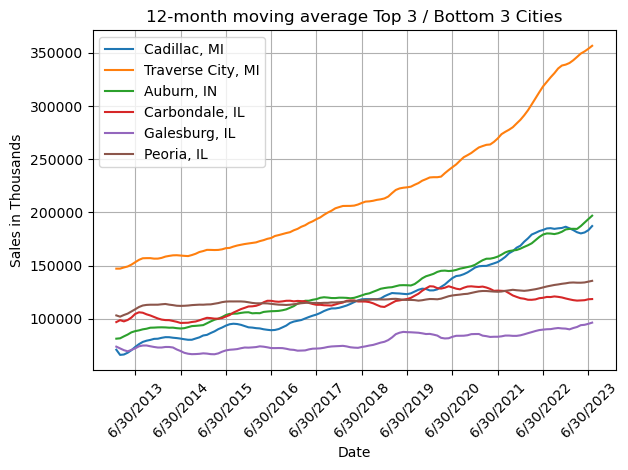

In [23]:
df_transposed = top_bottom_cities_combined_line.transpose()

custom_x_ticks = ["6/30/2013", "6/30/2014", "6/30/2015","6/30/2016", "6/30/2017","6/30/2018",
                  "6/30/2019", "6/30/2020", "6/30/2021", "6/30/2022", "6/30/2023"]

for region in df_transposed.columns:
    plt.plot(df_transposed.index, df_transposed[region], label=region)

plt.title("12-month moving average Top 3 / Bottom 3 Cities")
plt.xlabel("Date")
plt.ylabel("Sales in Thousands")
plt.legend()
plt.grid(True)
plt.xticks(custom_x_ticks, rotation=45)
plt.tight_layout()
plt.savefig("Images/Moving Averages/Cities_by_Region/12MMA_Midwest_Cities_line.png")
plt.show()